فراخوانی ماژول‌های لازم برای:
- ساختن و انجام عملیات بر روی آرایه‌ها 
`numpy`
- مصور‌سازی نتایج
`matplotlib `

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ساختن دو آرایه با رفتار خطی و توان ۲ بر حسب مقدار اندیس آن.  
سپس نمایش آن‌ها با رنگ‌های آبی و قرمز.

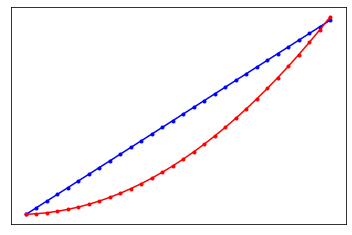

In [2]:
# Create Data
xs = np.arange(30)
ys_linear = xs * 60 + 3
ys_quad = 2 * xs**2 + 3 * xs + 4
# Visualize
plt.figure()

plt.plot( xs, ys_linear, 'b.-' )
plt.plot( xs, ys_quad, 'r.-' )

plt.xticks([])
plt.yticks([])
plt.show()

ساختن آرایه‌هایی که ترکیب روند و رفتار تناوبی هستند.  
سپس این آرایه‌ها با رنگ‌های قرمز و آبی نمایش داده می شوند.  
همانگونه که مشاهده می‌کنید، برای فاصله گرفتن از یک نمودار زیادی هموار، به مقدارها یک نویز هم اضافه شده است.

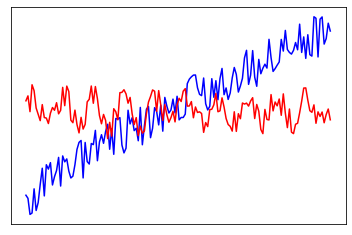

In [3]:
xs = np.linspace(0,30,150)
ys_trend = 0.8 * (xs)**(0.8) + 3 * np.random.rand(len(xs))
ys_periodic = 7 + np.sin( 2*np.pi * xs/3 ) + 2 * np.random.rand(len(xs))
#
plt.figure()

plt.plot(xs, ys_trend, 'b-')
plt.plot(xs, ys_periodic, 'r-')

plt.xticks([])
plt.yticks([])
plt.show()

محاسبه‌ی مقدار سینوس بر روی یک اعداد ۰ تا ۱۰۰ با دوره ی تناوب ۵۰.  
سپس محاسبه‌ی مقدارهای شیف داده شده به جلو (یعنی مقداری که در خانه‌ی ۰ است، در خانه‌ی ۱  نوشته می‌شود و ... )  
سپس محاسبه‌ی مقدار مقیاس شده ی نمودار سینوسی.  
دقت کنید که با وجود نزدیکی دو نمودار از نظر معیار متوسط خطای مربعی، نمودار مقیاس شده، قدرت پیش‌بینی دارد، در حالی که نمودار شیفت داده شده، این ویژگی را ندارد و مقدار واقعی در هر نقطه را، برای نقطه‌ی بعد گزارش می‌کند.

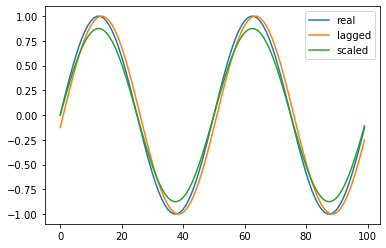

In [4]:
def mse( x, y ):
    return( np.mean((x-y)**2) )
xs = np.arange(50*2)
ys_target = np.sin( 1 * 2*np.pi * xs/50 )
ys_lagged = np.roll( ys_target, 1 )
ys_scaled = ys_target * 0.875
#
plt.figure()

plt.plot( xs, ys_target, label = 'real' )
plt.plot( xs, ys_lagged, label = 'lagged' )
plt.plot( xs, ys_scaled, label = 'scaled' )

plt.legend()
plt.show()

نصب کتابخانه‌ی 
`statmodels`

In [5]:
!pip3 install statsmodels

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


از ماژول «مدل‌های آماری» برای خواندن داده‌های «گل زنبق» (*iris*) استفاده می‌شود.  
داده‌های مربوط به گل‌های زنبق خوانده می‌شود.   
سپس به ازای هر گونه‌ی گل، یک ستون به عنوان رنگ اضافه می‌شود تا برای نمایش راحت‌تر باشیم.

In [6]:
import statsmodels.api as sm
#
iris = sm.datasets.get_rdataset('iris').data
#
iris_species = iris.Species.unique()
iris_species_colors = dict(zip(
    ['setosa', 'versicolor', 'virginica'],
    ['red','green','blue']
))
#
iris['colors'] = iris['Species'].map( lambda x: iris_species_colors[x] )

c:\users\mahta\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\datasets\utils.py:185: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


مشاهده‌ی چند سطر اول داده برای بررسی مقدارها و ساختار جدول

In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,colors
0,5.1,3.5,1.4,0.2,setosa,red
1,4.9,3.0,1.4,0.2,setosa,red
2,4.7,3.2,1.3,0.2,setosa,red
3,4.6,3.1,1.5,0.2,setosa,red
4,5.0,3.6,1.4,0.2,setosa,red


تصویر سازی بر اساس مولفه‌های **طول و عرض کاسبرگ** و رنگ کردن بر اساس **گونه‌**ی گل زنبق.

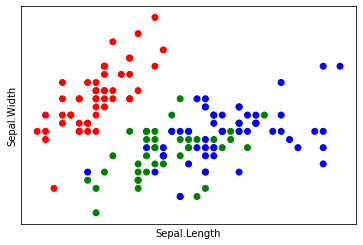

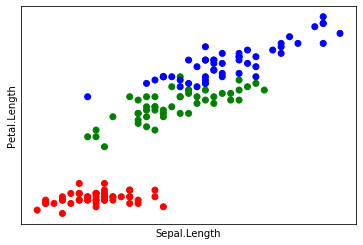

In [8]:
# Plot 1 : Width by Lenght
plt.figure()

plt.scatter(
    iris['Sepal.Length'].values,
    iris['Sepal.Width'].values,
    c = iris['colors']
)

plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.xticks([])
plt.yticks([])
plt.show()
# Plot 2 : Lenghth by Lenght
plt.figure()

plt.scatter(
    iris['Sepal.Length'].values,
    iris['Petal.Length'].values,
    c = iris['colors']
)

plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
!pip install requests

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


فراخوانی ماژول پانداس برای کار کردن با جدول داده‌ها.  
خراخوانی ماژول ریکوئستس برای دریافت اطلاعات از اینترنت.  
استفاده از داده‌ی مربوط به **شاخص کلی بورس ایران**.  

In [12]:
import pandas as pd
import requests
url = 'http://tsetmc.ir/tsev2/chart/data/Index.aspx?i=32097828799138957&t=value'

دریافت اطلاعات از لینک ذکر شده.

In [13]:
resp = requests.get(url)

In [14]:
resp.text[:100]

'1387/9/14,9248.9;1387/9/15,9248.9;1387/9/16,9178.3;1387/9/17,9130.5;1387/9/18,9089.2;1387/9/20,9023.'

تبدیل داده‌های دریافت شده به یک جدول از داده‌ها برای انجام پردازش و تصویر سازی.  

In [15]:
df = pd.DataFrame(
    [ x.split(',') for x in resp.text.split(';') ][-100:],
    columns = ['date','value'])
df['value'] = df['value'].astype(np.float)

In [16]:
df

,date,value
0,1398/5/7,252488.3
1,1398/5/8,252898.1
2,1398/5/9,254445.7
3,1398/5/12,254453.9
4,1398/5/13,255530.2
...,...,...
95,1398/9/30,353996.7
96,1398/10/1,356721.1
97,1398/10/2,359365.5
98,1398/10/3,362259.3


رسم نمودار مقدارهای شاخص در تاریخ‌های مختلف.  
سپس تغییر متن محور افقی برای خوانایی بیش‌تر.  

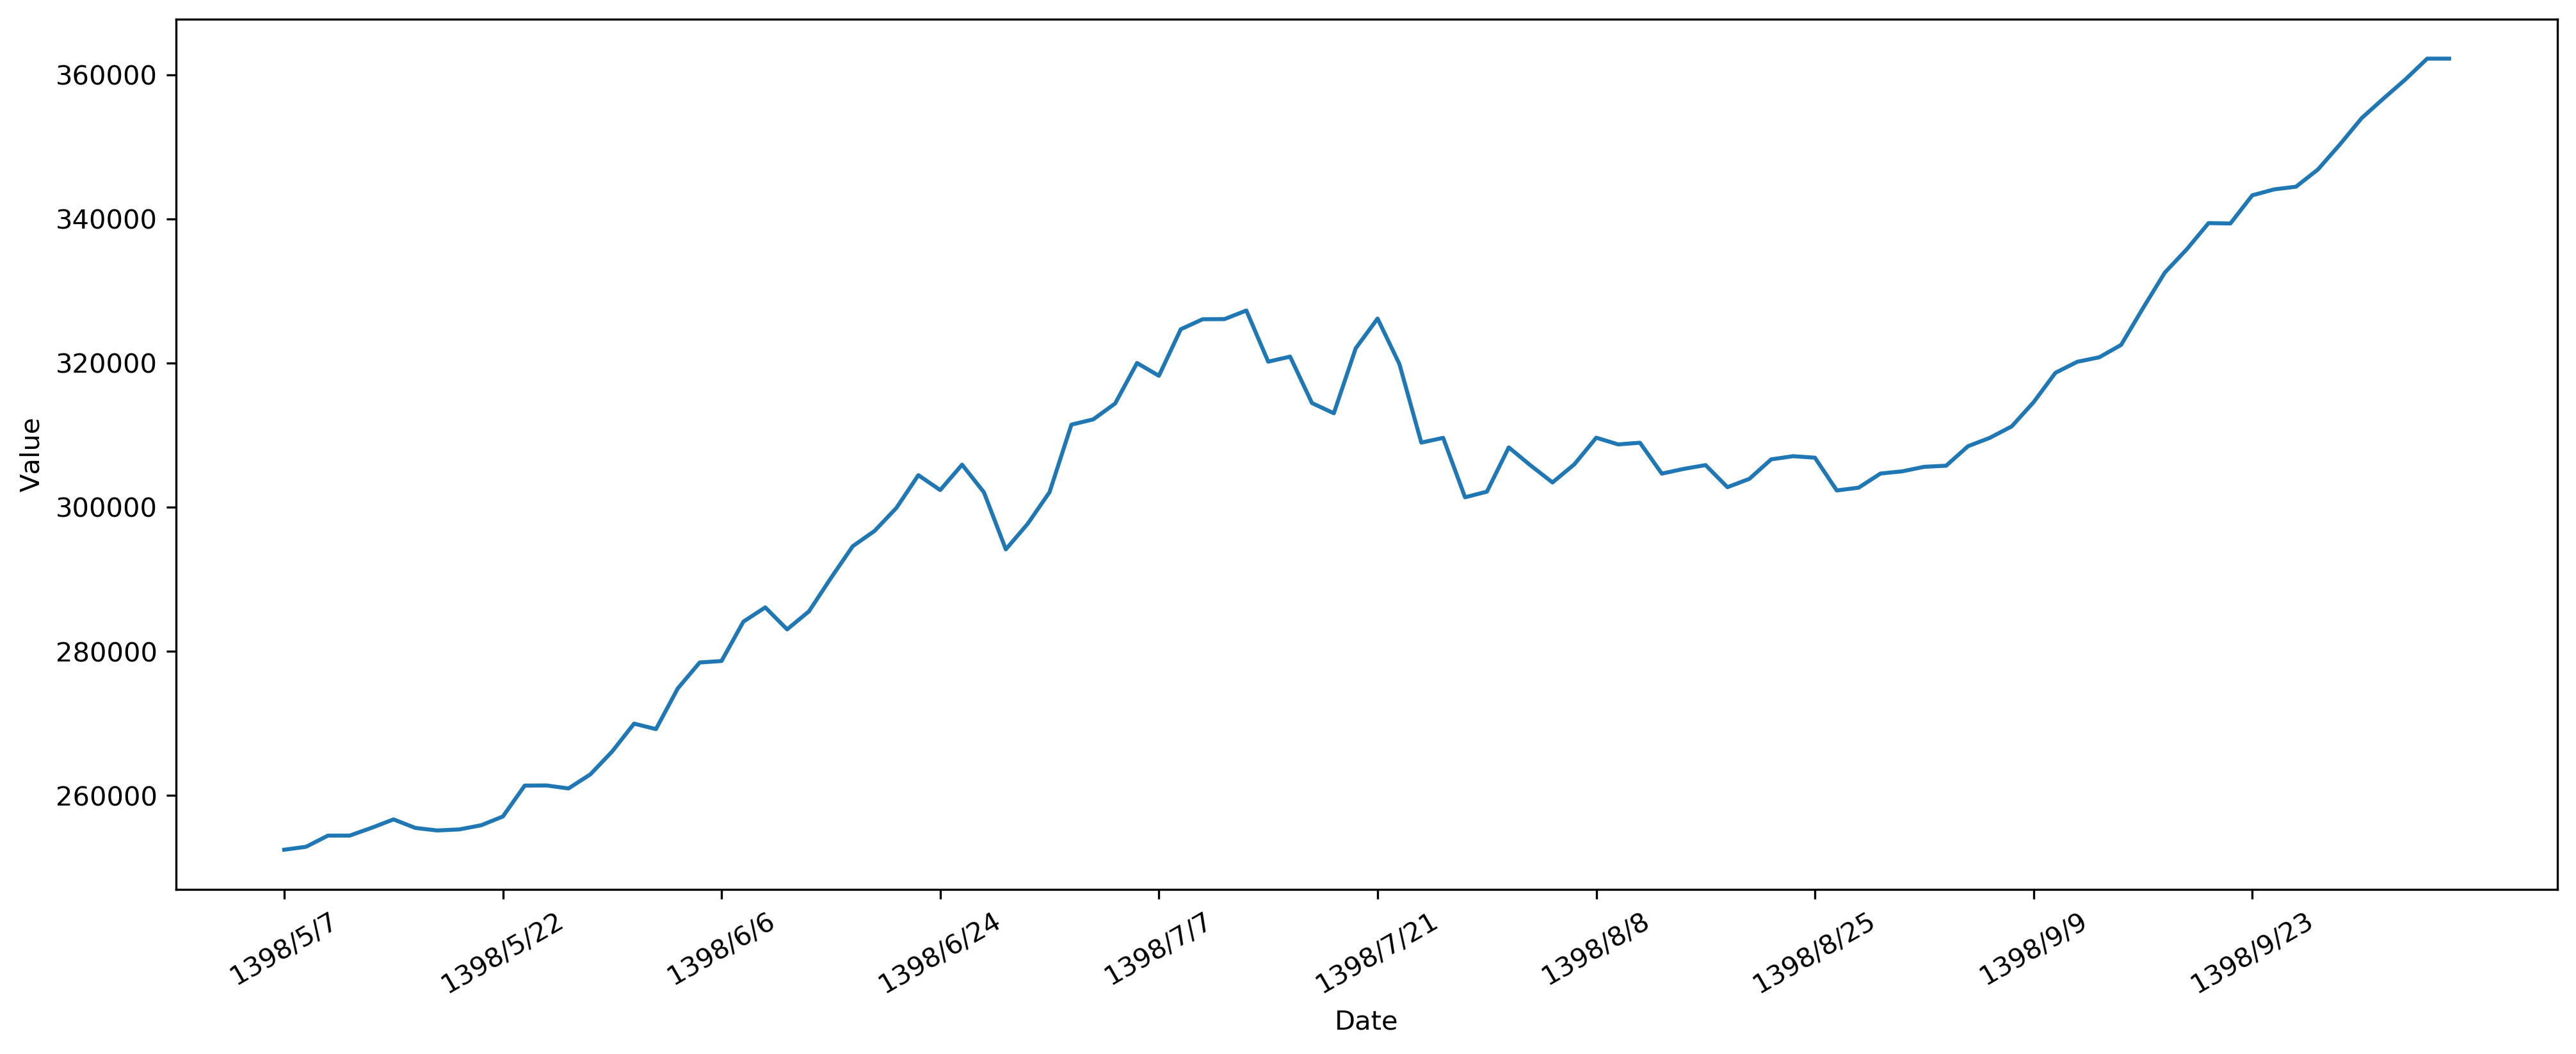

In [17]:
plt.figure( figsize=(16,6), dpi = 300 )

plt.plot( df['value'].values, '-' )

plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(
    list(range(100))[::10],
    df['date'].values[::10],
    rotation = 30
)
plt.show()

خواندن داده‌های مسافران سانحه‌ی تایتانیک و اضافه کردن رنگ بر اساس زنده ماندن و یا فوت کردن.  
اضافه کردن شکل بر اساس قسمت سوار شدن به کشتی.  

In [18]:
titanic = pd.read_csv('titanic.csv')
titanic['color'] = titanic['Survived'].map( lambda x: 'green' if x == 1 else 'red' )
shapes_dict = dict(zip(
    titanic['Embarked'].unique(),
    ['o','^','*','']
))
titanic['shape'] = titanic['Embarked'].map( lambda x: shapes_dict[x] )

فراخوانی تابع‌های لازم برای ساختن «راهنمای نمودار» در کنار صفحه.  
سپس تعریف راهنمای نمودار.  
رسم نمودارهای مختلف بر اساس محل سوار شدن به کشتی.  

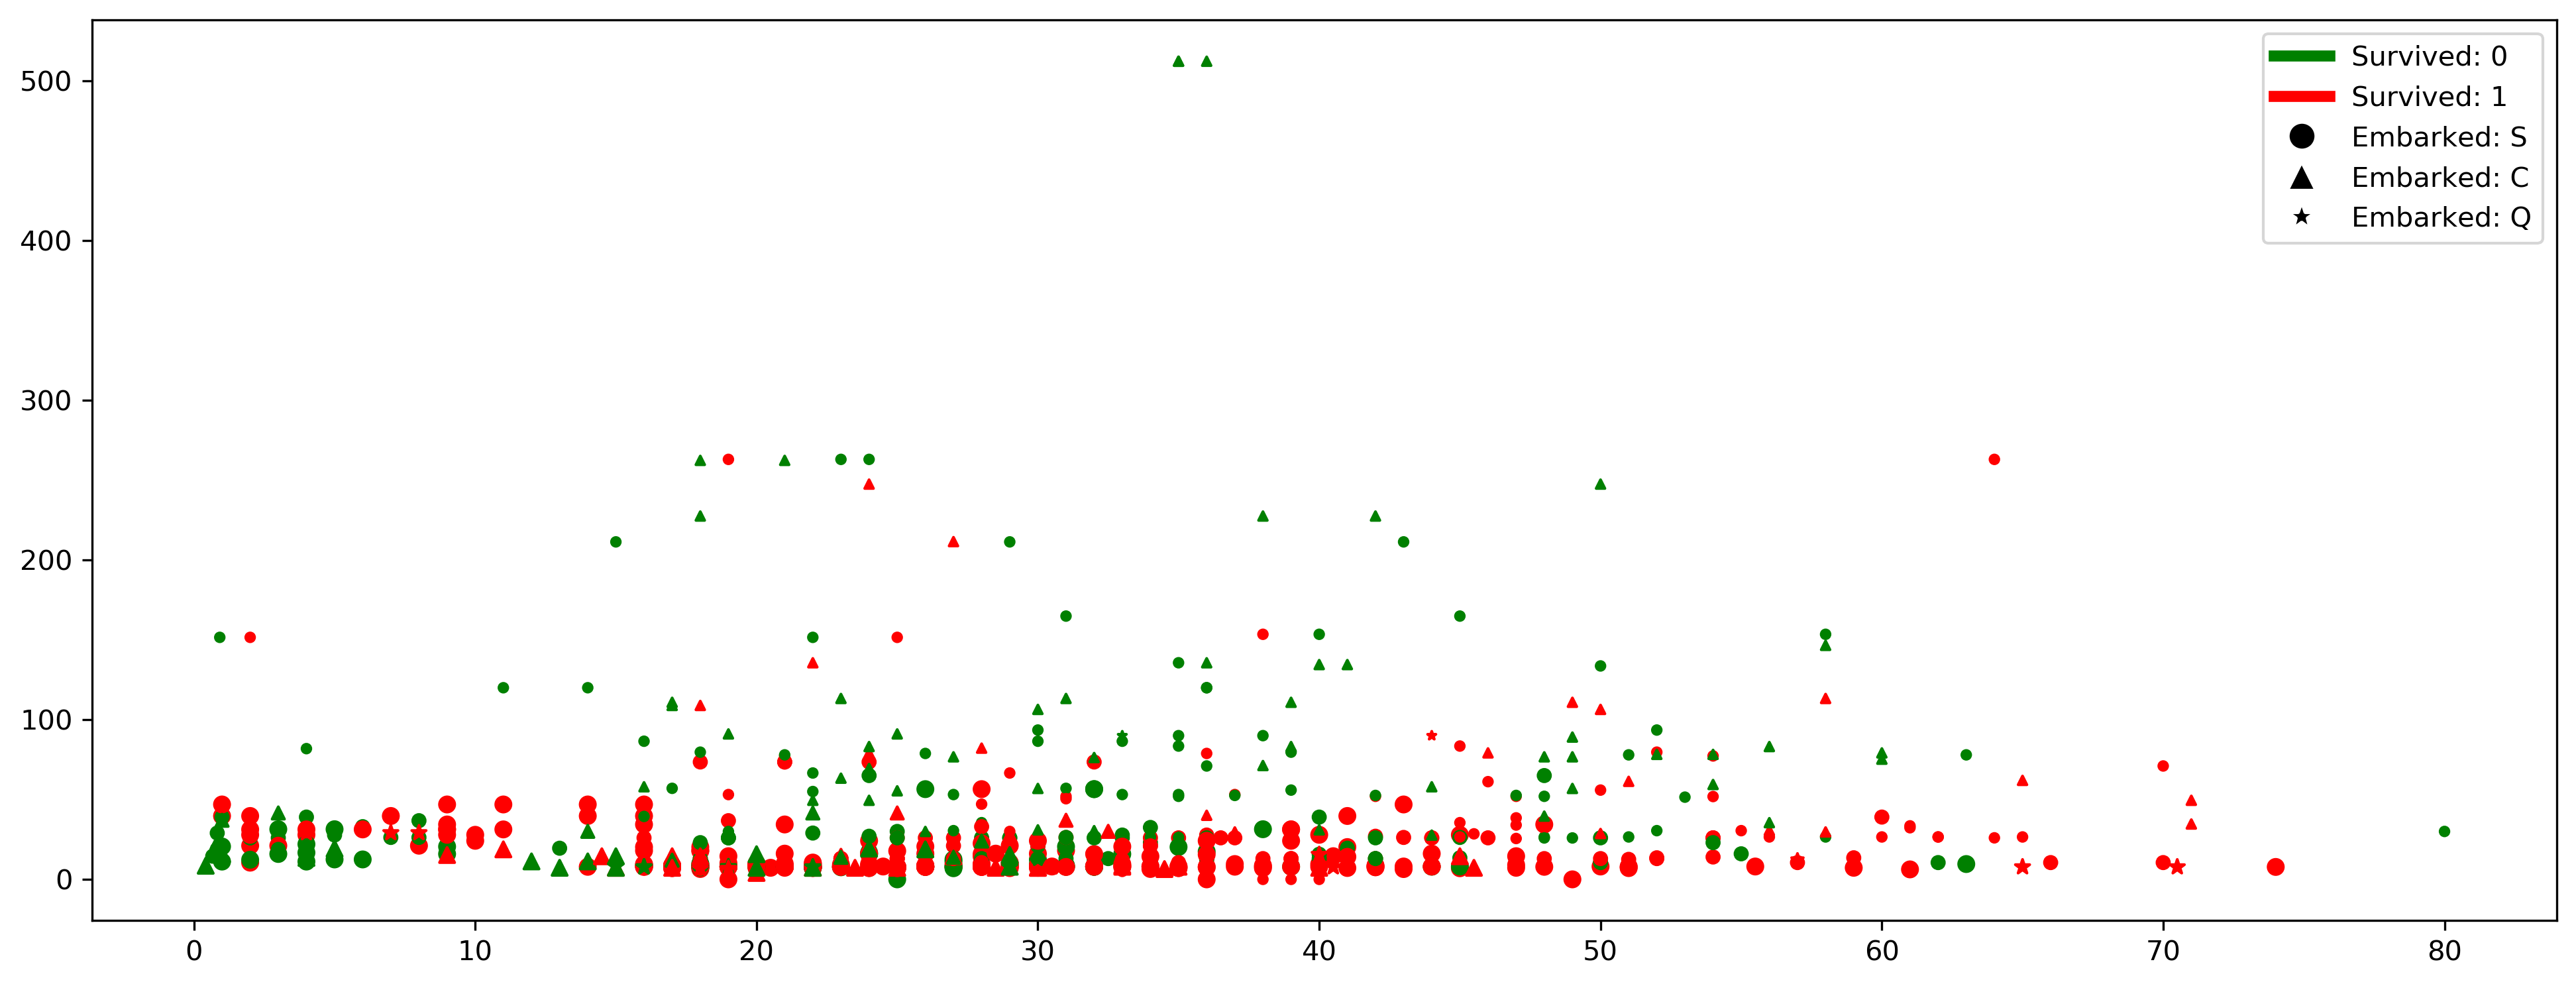

In [19]:
from matplotlib.lines import Line2D
legend_elements = [
    # Survived
    Line2D([0], [0], color='g', lw = 4, label='Survived: 0'),
    Line2D([0], [0], color='r', lw = 4, label='Survived: 1'),
    # Embarked
    Line2D([0], [0], marker='o', color='w', label='Embarked: S', markerfacecolor='k', markersize=10),
    Line2D([0], [0], marker='^', color='w', label='Embarked: C', markerfacecolor='k', markersize=10),
    Line2D([0], [0], marker='*', color='w', label='Embarked: Q', markerfacecolor='k', markersize=10)
]

plt.figure(figsize=(16,6),dpi=300)

for embarked in titanic['Embarked'].unique():
    to_plot = titanic[ titanic['Embarked'] == embarked ]
    plt.scatter(
        x = to_plot['Age'].values,
        y = to_plot['Fare'].values,
        s = to_plot['Pclass'].values*10,
        c = to_plot['color'].values,
        marker = shapes_dict[embarked]
    )

plt.legend(handles = legend_elements)
plt.show()